# Importing the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc

# 1. Loading the dataset

In [ ]:
# Define the labels
labels = ['PNEUMONIA', 'NORMAL', 'TUBERCULOSIS', 'COVID19']

# Set the image size
img_size = 150

# Function to load the training, test, and validation data
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        i = 1
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
                if(i%200 == 0):
                  print(i,class_num)
                i+=1
            except Exception as e:
                print(e)
    print("Data loaded")
    print()
    return np.array(data, dtype=object)

In [ ]:
# Load the data

train = get_training_data('/content/drive/MyDrive/S6/Mini Project/Project v2 (PNCT)/v2 Dataset 5.1.1 (replaced with COVID-19 Radiography Dataset)/train')
test = get_training_data('/content/drive/MyDrive/S6/Mini Project/Project v2 (PNCT)/v2 Dataset 5.1.1 (replaced with COVID-19 Radiography Dataset)/test')
val = get_training_data('/content/drive/MyDrive/S6/Mini Project/Project v2 (PNCT)/v2 Dataset 5.1.1 (replaced with COVID-19 Radiography Dataset)/val')

In [ ]:
# Load the data

#train = get_training_data('/content/drive/MyDrive/Prathyush Project/v2 Dataset 5.1.1 (replaced with COVID-19 Radiography Dataset)/train')
#test = get_training_data('/content/drive/MyDrive/Prathyush Project/v2 Dataset 5.1.1 (replaced with COVID-19 Radiography Dataset)/test')
#val = get_training_data('/content/drive/MyDrive/Prathyush Project/v2 Dataset 5.1.1 (replaced with COVID-19 Radiography Dataset)/val')

200 0
400 0
600 0
800 0
1000 0
1200 0
1400 0
1600 0
1800 0
2000 0
2200 0
2400 0
2600 0
2800 0
3000 0
3200 0
3400 0
200 1
400 1
600 1
800 1
1000 1
1200 1
1400 1
1600 1
1800 1
2000 1
2200 1
2400 1
2600 1
2800 1
200 2
400 2
600 2
800 2
200 3
400 3
600 3
800 3
1000 3
1200 3
1400 3
1600 3
1800 3
2000 3
2200 3
2400 3
2600 3
2800 3
Data loaded

200 0
400 0
200 1
200 3
Data loaded

200 0
400 0
200 1
200 3
Data loaded



# 2. Data Exploration

In [ ]:
print(train[300])
train.shape

[array([[77, 91, 96, ..., 37, 33, 42],
        [52, 61, 81, ..., 38, 33, 47],
        [57, 59, 59, ..., 33, 29, 44],
        ...,
        [19, 19, 17, ..., 28, 28, 28],
        [19, 19, 15, ..., 27, 28, 28],
        [19, 19, 15, ..., 27, 28, 28]], dtype=uint8) 0]


(9918, 2)

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    elif(i[1] == 1):
        l.append("Normal")
    elif(i[1] == 2):
        l.append("Tuberculosis")
    elif(i[1] == 3):
        l.append("Covid19")
print(l)

['Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia'

<Axes: ylabel='count'>

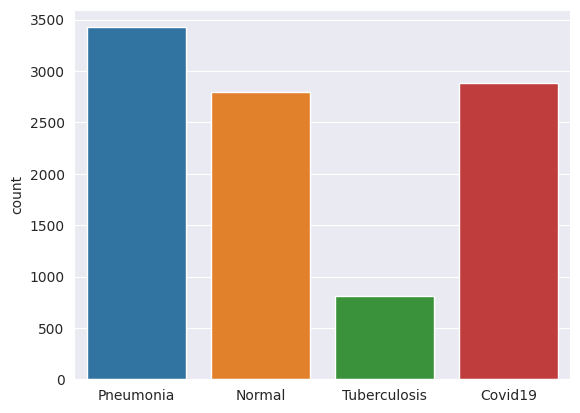

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x=l)

Text(0.5, 1.0, 'COVID19')

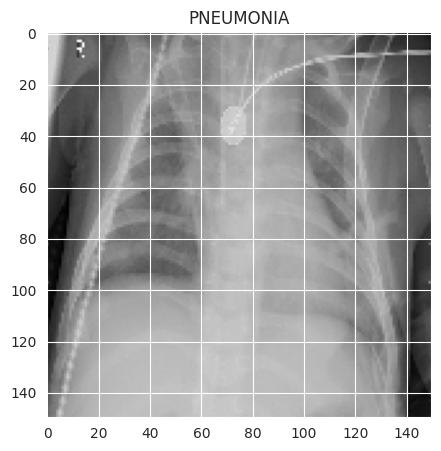

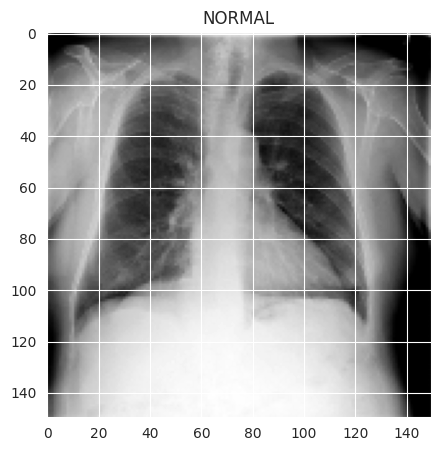

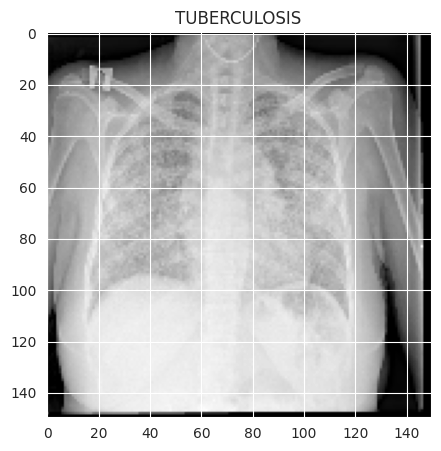

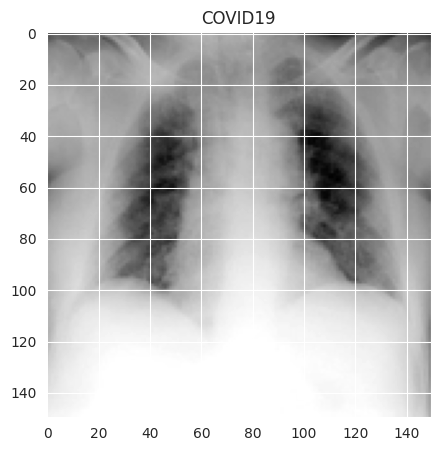

In [ ]:
# Previewing an image from each class

plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[3600][0], cmap='gray')
plt.title(labels[train[3600][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[6600][0], cmap='gray')
plt.title(labels[train[6500][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
# Split the data into features and labels

x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Accessing the no. of elements of each class in train, test, and val respectively

def get_element_frequency(arr):
    frequency_counter = Counter(arr)
    return frequency_counter

for i in (y_train,y_test,y_val):
    frequency = get_element_frequency(i)
    for element, count in frequency.items():
        print(f"The element {element} appears {count} times.")
    print()

The element 0 appears 3425 times.
The element 1 appears 2800 times.
The element 2 appears 813 times.
The element 3 appears 2880 times.

The element 0 appears 427 times.
The element 1 appears 350 times.
The element 2 appears 100 times.
The element 3 appears 367 times.

The element 0 appears 427 times.
The element 1 appears 350 times.
The element 2 appears 99 times.
The element 3 appears 366 times.



In [ ]:
num_test_samples = len(x_train)
print("Number of x_train samples:", num_test_samples)

num_test_samples = len(x_test)
print("Number of x_test samples:", num_test_samples)

num_test_samples = len(x_val)
print("Number of x_val samples:", num_test_samples)

Number of x_train samples: 9918
Number of x_test samples: 1244
Number of x_val samples: 1242


# 3. Data Preprocessing

**Normalization:** We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# Resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
# Convert class vectors to binary class matrices (one-hot encoding)

y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# 4. Model
Building, Training, and Visulaization

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/S6/Mini Project/Project v2 (PNCT)/Models/Model of Jv2.12 [99.51% acc] Dataset 5.1.1, Arch 1, 100 epoch, 16 batch size.h5")

In [2]:
# Building the model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
len(model.layers)

20

In [3]:
pip install visualkeras

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [4]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(model, legend=True, to_file='Arch1_Model_Figure.png')

ModuleNotFoundError: ignored

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=9bf831ad21bf620da9d5ea5add9998aaf0289ea7e3544d0388f9665ba074a88c
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz

visual_model = Sequential()

visual_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
visual_model.add(MaxPool2D((2, 2)))
visual_model.add(Conv2D(64, (3, 3), activation='relu'))
visual_model.add(MaxPool2D((2, 2)))
visual_model.add(Conv2D(128, (3, 3), activation='relu'))
visual_model.add(MaxPool2D((2, 2)))
visual_model.add(Conv2D(256, (3, 3), activation='relu'))
visual_model.add(MaxPool2D((2, 2)))
visual_model.add(Flatten())
visual_model.add(Dense(512, activation='relu'))
visual_model.add(Dropout(0.5))
visual_model.add(Dense(256, activation='relu'))
visual_model.add(Dropout(0.5))
visual_model.add(Dense(128, activation='relu'))
visual_model.add(Dropout(0.5))
visual_model.add(Dense(4, activation='softmax'))

ann_viz(visual_model, view=True, filename='Arch1_FCL_Figure', title='Arch1 FC Layer Visualization')

In [ ]:
pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras_sequential_ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3043 sha256=4c80a90a83513870b6940f1552b8de5413d9733d24f29e8c9fb031371f6da412
  Stored in directory: /root/.cache/pip/wheels/50/10/f3/5eeae758ef81ee4e16d618471561509355b0f2e5f38bf41185
Successfully built keras_sequential_ascii


In [5]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

ModuleNotFoundError: ignored

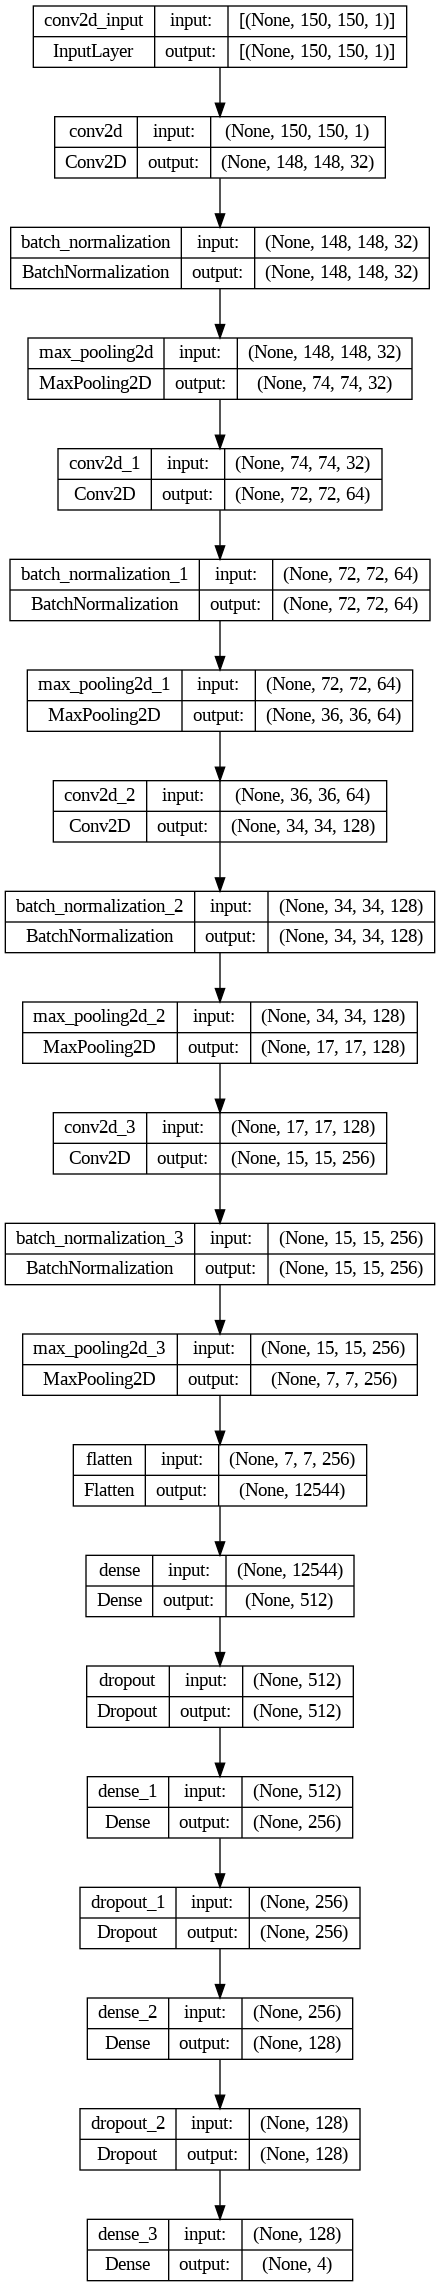

In [ ]:
# Model Architecture Visualization

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='Arch1_Detailed_Figure.png', show_shapes=True, show_layer_names=True)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)

In [ ]:
# Training the model
history = model.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/100
620/620 [==============================] - 28s 21ms/step - loss: 1.6191 - accuracy: 0.7068 - val_loss: 1.1691 - val_accuracy: 0.5862 - lr: 0.0010
Epoch 2/100
620/620 [==============================] - 12s 19ms/step - loss: 0.4057 - accuracy: 0.8653 - val_loss: 5.7900 - val_accuracy: 0.3390 - lr: 0.0010
Epoch 3/100
620/620 [==============================] - 12s 19ms/step - loss: 0.2710 - accuracy: 0.9112 - val_loss: 1.9847 - val_accuracy: 0.6208 - lr: 0.0010
Epoch 4/100
620/620 [==============================] - 12s 19ms/step - loss: 0.2467 - accuracy: 0.9221 - val_loss: 0.4371 - val_accuracy: 0.8261 - lr: 0.0010
Epoch 5/100
620/620 [==============================] - 12s 19ms/step - loss: 0.1920 - accuracy: 0.9402 - val_loss: 0.9021 - val_accuracy: 0.5902 - lr: 0.0010
Epoch 6/100
618/620 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9496
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
620/620 [============================

In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1] * 100, "%")

39/39 [==============================] - 1s 17ms/step - loss: 0.0241 - accuracy: 0.9936
Loss of the model is -  0.02413715422153473
39/39 [==============================] - 0s 11ms/step - loss: 0.0241 - accuracy: 0.9936
Accuracy of the model is -  99.35691356658936 %


In [ ]:
#model.save("Model of Jv2 [99.51% acc] Dataset 5.1.1, Arch 1, 100 epoch, 16 batch size.h5")

# 5. Post-Training Analysis:

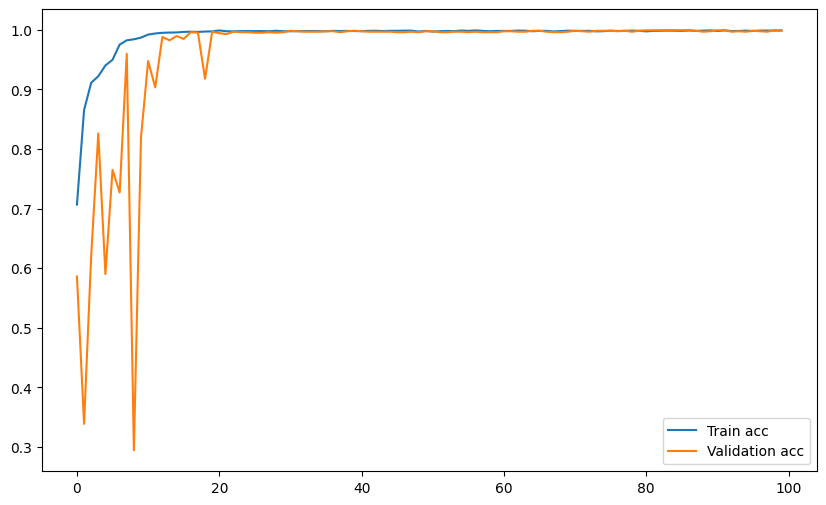

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

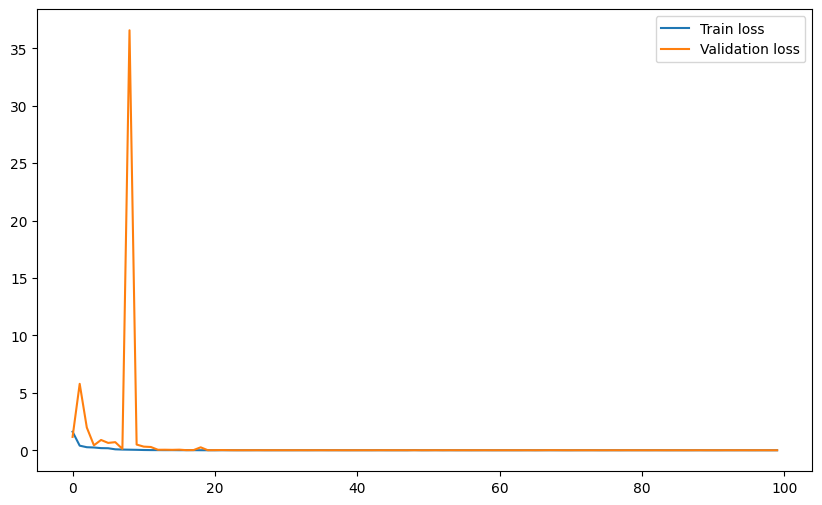

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

# 6. Precision, Recall, F1-score, Support

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert predictions to class labels
true_labels = np.argmax(y_test, axis=1)  # Convert true labels to class labels

39/39 [==============================] - 1s 9ms/step


In [ ]:
print(classification_report(true_labels, predicted_labels, target_names=labels))

              precision    recall  f1-score   support

   PNEUMONIA       1.00      0.99      1.00       427
      NORMAL       0.99      0.99      0.99       350
TUBERCULOSIS       0.99      0.99      0.99       100
     COVID19       0.99      1.00      0.99       367

    accuracy                           0.99      1244
   macro avg       0.99      0.99      0.99      1244
weighted avg       0.99      0.99      0.99      1244



# 7. Confusion Matrix

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)
cm

array([[424,   1,   0,   2],
       [  1, 347,   1,   1],
       [  0,   1,  99,   0],
       [  0,   1,   0, 366]])

In [ ]:
cm = pd.DataFrame(cm, index=labels, columns=labels)

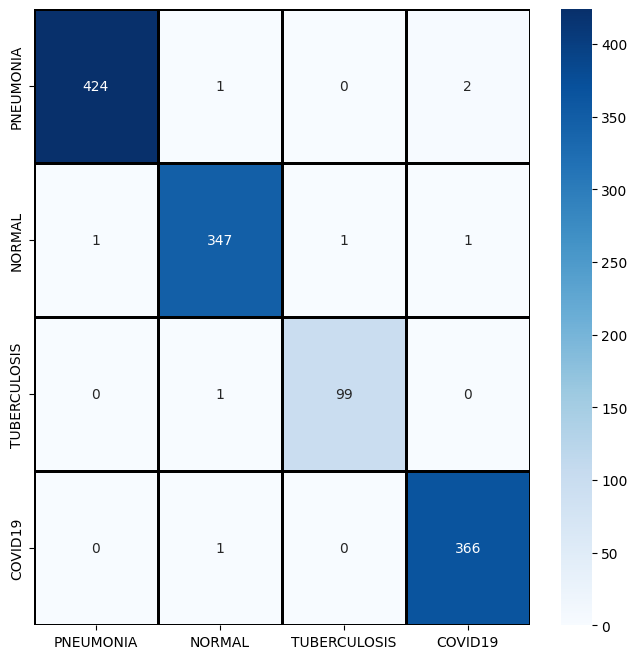

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)
plt.show()

# 9. Visualizing the predicted images

In [ ]:
correct = np.nonzero(predicted_labels == true_labels)[0]
incorrect = np.nonzero(predicted_labels != true_labels)[0]

In [ ]:
correct

In [ ]:
correct.size

1236

In [ ]:
incorrect

array([  79,  298,  299,  450,  470,  598,  868, 1043])

In [ ]:
incorrect.size

8

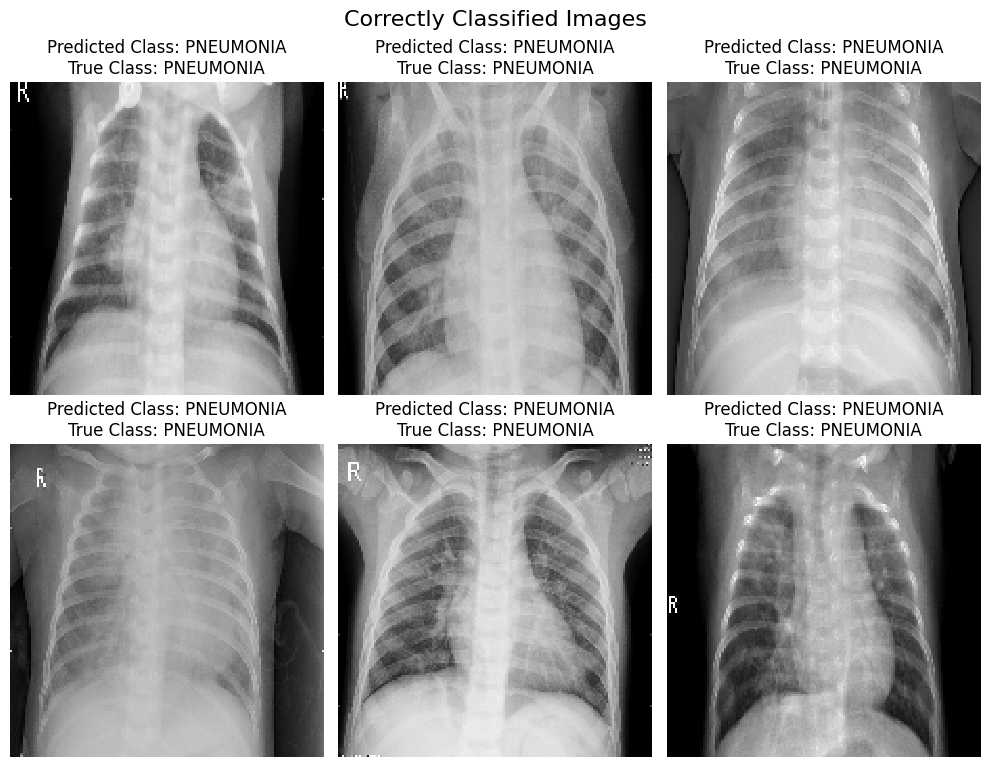

In [ ]:
# Visualize correctly classified images

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Correctly Classified Images', fontsize=16)
for i, idx in enumerate(correct[:6]):
    row = i // 3
    col = i % 3
    axes[row, col].imshow(x_test[idx].reshape(img_size, img_size), cmap="gray", interpolation='none')
    axes[row, col].set_title("Predicted Class: {}\nTrue Class: {}".format(labels[predicted_labels[idx]], labels[true_labels[idx]]))
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

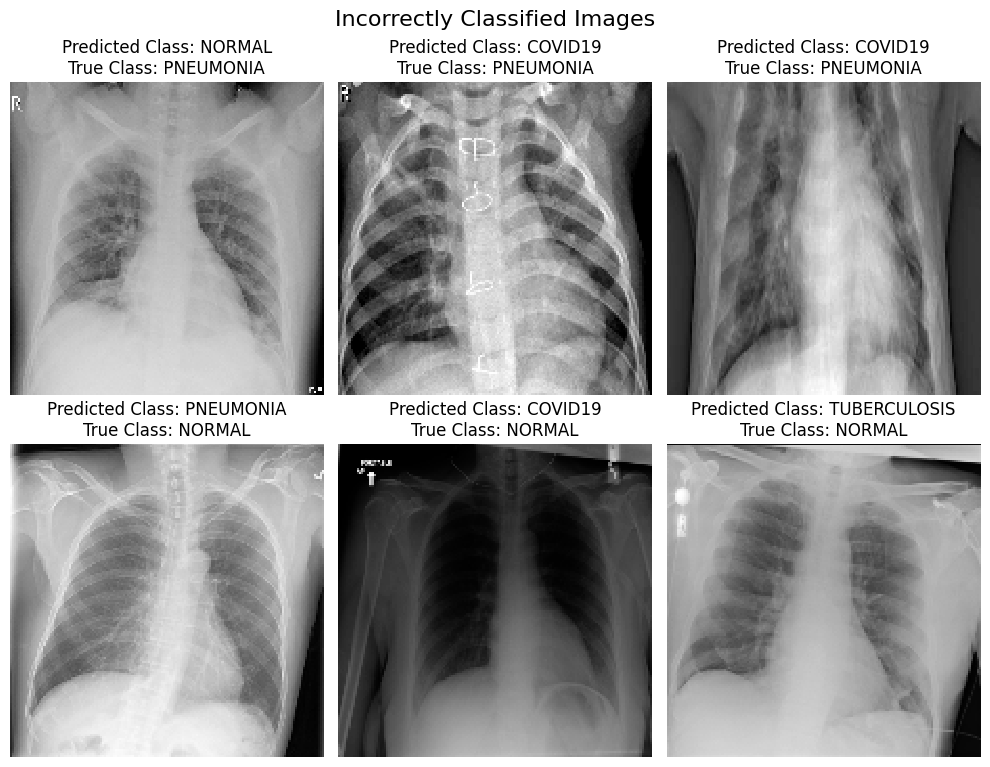

In [ ]:
# Visualize incorrectly classified images

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Incorrectly Classified Images', fontsize=16)
for i, idx in enumerate(incorrect[:6]):
    row = i // 3
    col = i % 3
    axes[row, col].imshow(x_test[idx].reshape(img_size, img_size), cmap="gray", interpolation='none')
    axes[row, col].set_title("Predicted Class: {}\nTrue Class: {}".format(labels[predicted_labels[idx]], labels[true_labels[idx]]))
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

# 10. Random Predictions

In [ ]:
image = '/content/drive/MyDrive/S6/Mini Project/Project v2 (PNCT)/Downloaded Images/P1.jpeg'
def preprocess_image(image_path):
    img_arr = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    preprocessed_img = np.array(resized_arr) / 255.0
    preprocessed_img = preprocessed_img.reshape(-1, img_size, img_size, 1)
    return preprocessed_img

# Assuming 'image' is the variable containing the path to the image you want to predict
preprocessed_img = preprocess_image(image)
prediction = model.predict(preprocessed_img)
predicted_class = labels[np.argmax(prediction)]
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 19ms/step
Predicted class: PNEUMONIA
